In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from sklearn.metrics import accuracy_score, confusion_matrix, cohen_kappa_score, classification_report
import ssl
import shap
import os
from random import shuffle
import shutil
# neural network all tools
import numpy as np
import pandas as pd
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets,models,transforms
from torch.utils.data.sampler import SubsetRandomSampler
# data visualization tools
import matplotlib.pyplot as plt
import time
import copy
from random import shuffle
import tqdm.notebook as tqdm
#image manipulation tools
import sklearn
from sklearn.metrics import accuracy_score, cohen_kappa_score,classification_report
from PIL import Image
import cv2
import os
import shutil

In [ ]:
# neural network all tools
import numpy as np
import pandas as pd
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets,models,transforms
from torch.utils.data.sampler import SubsetRandomSampler
# data visualization tools
import matplotlib.pyplot as plt
import time
import copy
from random import shuffle
import tqdm.notebook as tqdm
#image manipulation tools
import sklearn
from sklearn.metrics import accuracy_score, cohen_kappa_score,classification_report
from PIL import Image
import cv2
import os
import shutil

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/full_df.csv')
disease_lables=df.columns[7:15]
df.columns
df['labels'].unique()

array(["['N']", "['D']", "['O']", "['M']", "['H']", "['C']", "['A']",
       "['G']"], dtype=object)

<Axes: >

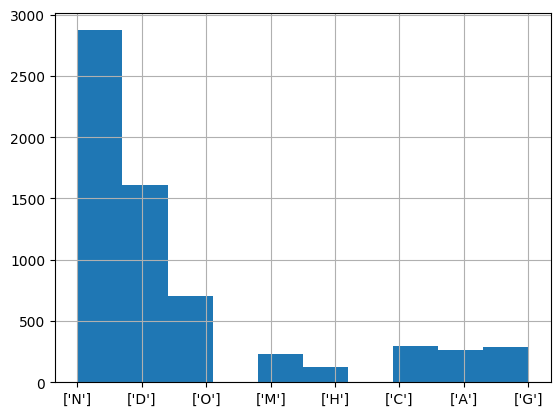

In [ ]:
df['labels'].hist()

In [ ]:
len(df[df['C']== 1])

402

In [ ]:
s={}
for i in df['labels'].unique():
  df2=df[df['labels'] == f"{i}"]
  df2= df2[['Left-Fundus', 'Right-Fundus', 'labels']]
  s[i]=df2.reset_index()

In [ ]:
s["['C']"]

,index,Left-Fundus,Right-Fundus,labels
0,20,24_left.jpg,24_right.jpg,['C']
1,93,112_left.jpg,112_right.jpg,['C']
2,160,188_left.jpg,188_right.jpg,['C']
3,186,218_left.jpg,218_right.jpg,['C']
4,309,354_left.jpg,354_right.jpg,['C']
...,...,...,...,...
288,4697,2243_left.jpg,2243_right.jpg,['C']
289,4698,2246_left.jpg,2246_right.jpg,['C']
290,4699,2247_left.jpg,2247_right.jpg,['C']
291,4700,2248_left.jpg,2248_right.jpg,['C']


In [ ]:
shutil.rmtree("ocular_1/train/normal")
shutil.rmtree("ocular_1/train/cataract")

In [ ]:
os.makedirs("ocular_1/train/normal")
os.makedirs("ocular_1/train/cataract")
normal_p=("ocular_1/test/normal")
cataract_p=("ocular_1/test/cataract")

In [ ]:
image_path1 = r"/content/drive/MyDrive/preprocessed_images"
image_path2 = r"/content/drive/MyDrive/ODIR-5K"

for j in ["Left-Fundus","Right-Fundus"]:
  for i in s["['C']"][j]:
    try:
      shutil.copy(os.path.join(image_path1, i ),'./ocular_1/train/cataract')
    except:
      try:
        shutil.copy(os.path.join(image_path2, i ),'./ocular_1/train/cataract')
      except:
        print(f"cant find : {os.path.join(image_path1, i )}")

cant find : /content/drive/MyDrive/preprocessed_images/188_left.jpg
cant find : /content/drive/MyDrive/preprocessed_images/955_left.jpg
cant find : /content/drive/MyDrive/preprocessed_images/1062_left.jpg
cant find : /content/drive/MyDrive/preprocessed_images/2102_left.jpg
cant find : /content/drive/MyDrive/preprocessed_images/2139_left.jpg
cant find : /content/drive/MyDrive/preprocessed_images/2231_left.jpg
cant find : /content/drive/MyDrive/preprocessed_images/2244_left.jpg
cant find : /content/drive/MyDrive/preprocessed_images/2251_left.jpg
cant find : /content/drive/MyDrive/preprocessed_images/1456_right.jpg
cant find : /content/drive/MyDrive/preprocessed_images/1968_right.jpg
cant find : /content/drive/MyDrive/preprocessed_images/2107_right.jpg
cant find : /content/drive/MyDrive/preprocessed_images/2159_right.jpg
cant find : /content/drive/MyDrive/preprocessed_images/2229_right.jpg
cant find : /content/drive/MyDrive/preprocessed_images/2241_right.jpg


In [ ]:
len(os.listdir('./ocular_1/train/cataract'))

392

In [ ]:
image_path1 = r"/content/drive/MyDrive/preprocessed_images"
image_path2 = r"/content/drive/MyDrive/ODIR-5K"
n=0
for j in ["Left-Fundus","Right-Fundus"]:
  for i in s["['N']"][j]:
    if n<=len(os.listdir('./ocular_1/train/cataract'))+20:
      try:
        shutil.copy(os.path.join(image_path1, i ),'./ocular_1/train/normal')
        n+=1
      except:
        try:
          shutil.copy(os.path.join(image_path2, i ),'./ocular_1/train/normal')
        except:
          print(f"cant find : {os.path.join(image_path1, i )}")

cant find : /content/drive/MyDrive/preprocessed_images/38_left.jpg
cant find : /content/drive/MyDrive/preprocessed_images/66_left.jpg
cant find : /content/drive/MyDrive/preprocessed_images/74_left.jpg
cant find : /content/drive/MyDrive/preprocessed_images/78_left.jpg
cant find : /content/drive/MyDrive/preprocessed_images/108_left.jpg
cant find : /content/drive/MyDrive/preprocessed_images/114_left.jpg
cant find : /content/drive/MyDrive/preprocessed_images/141_left.jpg
cant find : /content/drive/MyDrive/preprocessed_images/183_left.jpg
cant find : /content/drive/MyDrive/preprocessed_images/208_left.jpg
cant find : /content/drive/MyDrive/preprocessed_images/236_left.jpg
cant find : /content/drive/MyDrive/preprocessed_images/242_left.jpg
cant find : /content/drive/MyDrive/preprocessed_images/276_left.jpg
cant find : /content/drive/MyDrive/preprocessed_images/293_left.jpg
cant find : /content/drive/MyDrive/preprocessed_images/336_left.jpg
cant find : /content/drive/MyDrive/preprocessed_imag

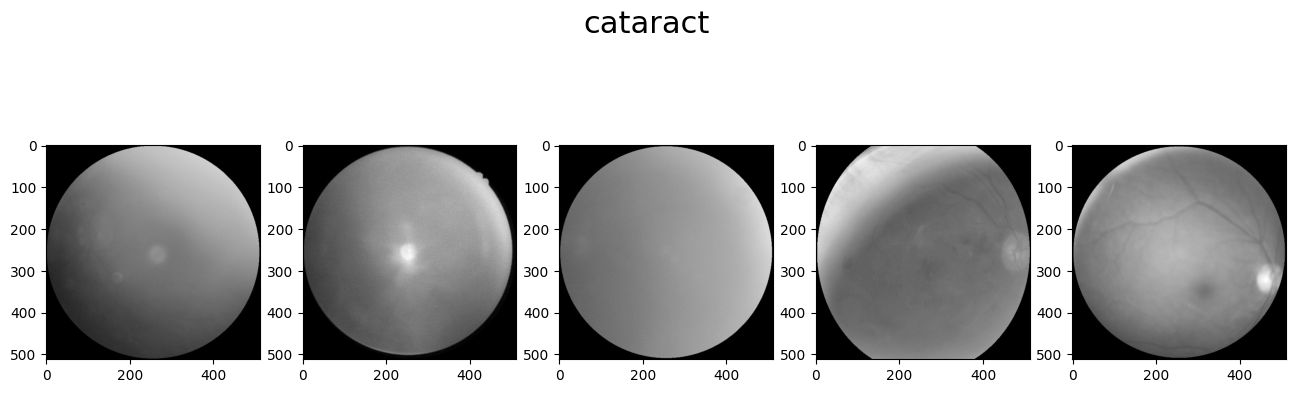

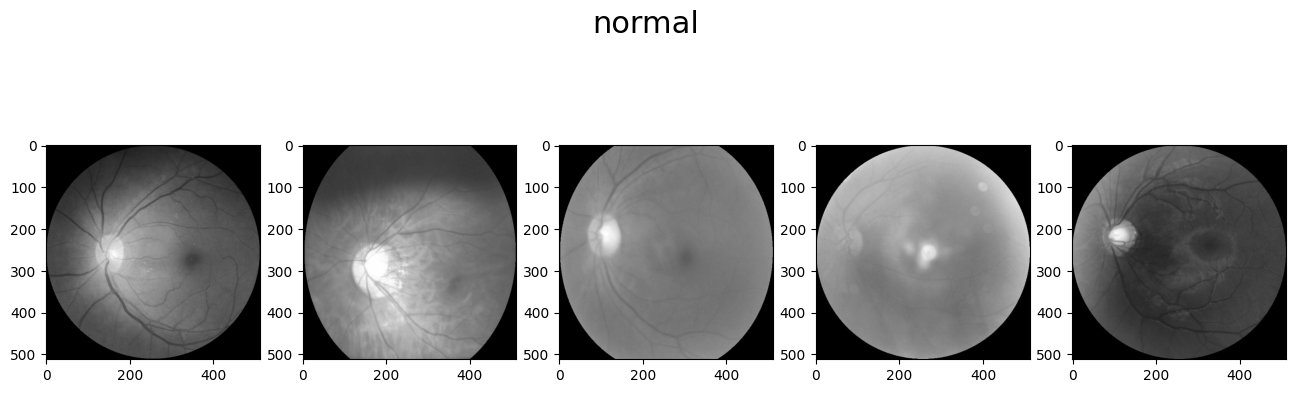

In [ ]:
fig = plt.figure(figsize=(16,5))
fig.suptitle("cataract", size=22)
img_path = os.listdir('./ocular_1/train/cataract')
for i, img in enumerate(img_path[:5]):
  try:
    img = cv2.imread(os.path.join('./ocular_1/train/cataract',img))
    img = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
    plt.subplot(1,5,i+1)
    plt.imshow(img, cmap='gray')
  except:
    pass
fig = plt.figure(figsize=(16,5))
fig.suptitle("normal", size=22)
img_path = os.listdir('./ocular_1/train/normal')
for i, img in enumerate(img_path[:5]):
  try:
    img = cv2.imread(os.path.join('./ocular_1/train/normal',img))
    img = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
    plt.subplot(1,5,i+1)
    plt.imshow(img, cmap= 'gray')
  except:
    pass

In [ ]:
mean_nums = [0.485, 0.456, 0.406]
std_nums = [0.229, 0.224, 0.225]
data_transforms = {"train":transforms.Compose([
                    transforms.Resize((227,227)),
                    #Resizes all images into same dimension
                    transforms.RandomRotation(10),
                    # Rotates the images upto Max of 10 Degrees
                    transforms.RandomHorizontalFlip(p=0.4),
                    #Performs Horizantal Flip over images
                    transforms.ToTensor(),
                    # Coverts into Tensors
                    transforms.Normalize(mean = mean_nums, std=std_nums)]),
                    # Normalizes
                    "val": transforms.Compose([
                    transforms.Resize((227,227)),
                    #Performs Crop at Center and resizes it to 150x150
                    transforms.ToTensor(),
                    transforms.Normalize(mean=mean_nums, std = std_nums)
                    ])}

In [ ]:
def load_split_train_test(datadir, valid_size=.2):
    train_data = datasets.ImageFolder(datadir, transform=data_transforms['train'])
    test_data = datasets.ImageFolder(datadir, transform=data_transforms['val'])
    num_train = len(train_data)
    indexes = list(range(num_train))
    split = int(np.floor(valid_size*num_train))
    np.random.shuffle(indexes)
    train, test = indexes[split:], indexes[:split]
    dataset_size = {"train": len(train), "val": len(test)}
    # Sampler for splitting train and val images
    train_sampler = SubsetRandomSampler(train)
    test_sampler = SubsetRandomSampler(test)
    trainloader = torch.utils.data.DataLoader(train_data,
                                              sampler=train_sampler, batch_size=16)
    # DataLoader provides data from traininng and validation in batches
    testloader = torch.utils.data.DataLoader(test_data,
                                             sampler=test_sampler, batch_size=16)
    return trainloader, testloader, dataset_size
trainloader, valloader, dataset_size = load_split_train_test("/content/ocular_1/train", .2)
dataloaders = {"train": trainloader, "val": valloader}
data_sizes = {x: len(dataloaders[x].sampler) for x in ['train', 'val']}
class_names = trainloader.dataset.classes
print(class_names)


['cataract', 'normal']


In [ ]:
def imshow(inp, size =(30,30), title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = mean_nums
    std = std_nums
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=size)
    plt.imshow(inp)
    if title is not None:
        plt.title(title, size=30)
    plt.pause(0.001)  # pause a bit so that plots are updated


In [ ]:
inputs, classes = next(iter(dataloaders['train']))

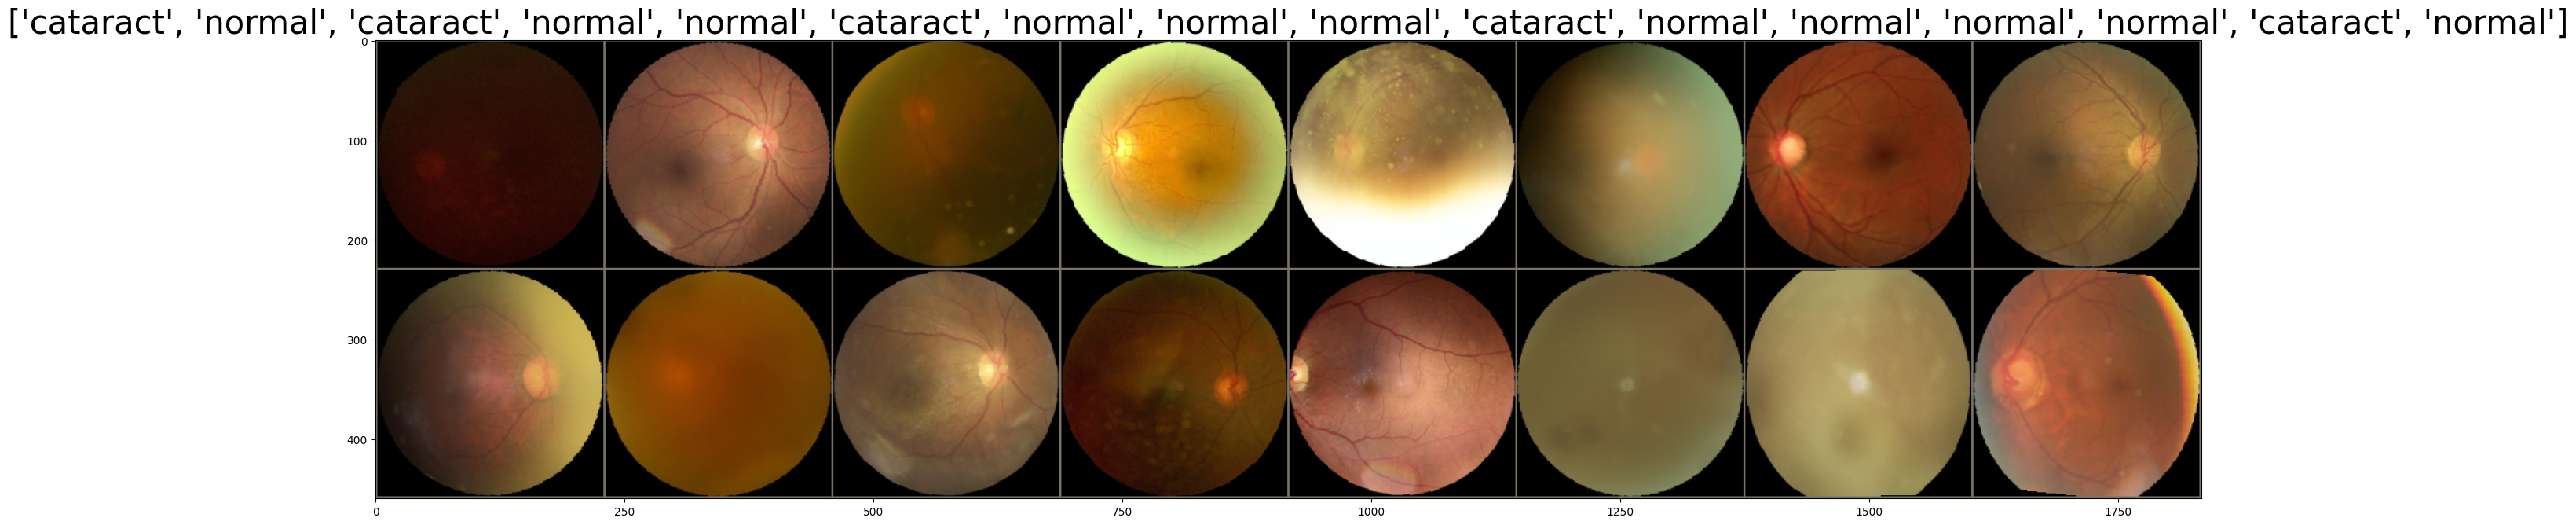

In [ ]:
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

In [ ]:
if torch.cuda.is_available():
    device=torch.device("cuda:0")
    print("Training on GPU... Ready for HyperJump...")
else:
    device = torch.device("cpu")
    print("Training on CPU... May the force be with you...")


Training on GPU... Ready for HyperJump...


In [ ]:
class VGG16_Model(nn.Module):
    # model = models.vgg16(pretrained=pretrained)
    # Returns Defined Densenet model with weights trained on ImageNet
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3,64, kernel_size=3, stride =1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU())
        self.layer2 = nn.Sequential(
            nn.Conv2d(64,64, kernel_size=3, stride =1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(64,128, kernel_size=3, stride =1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv2d(128,128, kernel_size=2, stride =1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer5 = nn.Sequential(
            nn.Conv2d(128,256, kernel_size=3, stride =1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.layer6 = nn.Sequential(
            nn.Conv2d(256,256, kernel_size=3, stride =1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.layer7 = nn.Sequential(
            nn.Conv2d(256,256, kernel_size=2, stride =1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer8 = nn.Sequential(
            nn.Conv2d(256,512, kernel_size=3, stride =1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU()
        )
        self.layer9 = nn.Sequential(
            nn.Conv2d(512,512, kernel_size=3, stride =1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU()
        )
        self.layer10 = nn.Sequential(
            nn.Conv2d(512,512, kernel_size=3, stride =1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer11 = nn.Sequential(
            nn.Conv2d(512,512, kernel_size=3, stride =1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU()
        )
        self.layer12 = nn.Sequential(
            nn.Conv2d(512,512, kernel_size=2, stride =1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU()
        )
        self.layer13 = nn.Sequential(
            nn.Conv2d(512,512, kernel_size=3, stride =1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(7*7*512, 4096),
            nn.ReLU()
        )
        self.fc1 = nn.Sequential(
            nn.Dropout(0.1),
            nn.Linear(4096,4096),
            nn.ReLU()
        )
        self.denselayer = nn.Sequential(
            nn.Linear(4096,512),
            nn.Linear(512,128),
            nn.Dropout(0.1),
            nn.Linear(128,32),
            nn.Dropout(0.1),
            nn.Linear(32,2),
        )
    def forward(self,x):
        print(x.shape)
        out = self.layer1(x)
        # print(out.shape)
        out = self.layer2(out)
        # print(out.shape)
        out = self.layer3(out)
        # print(out.shape)
        out = self.layer4(out)
        # print(out.shape)
        out = self.layer5(out)
        # print(out.shape)
        out = self.layer6(out)
        # print(out.shape)
        out = self.layer7(out)
        # print(out.shape)
        out = self.layer8(out)
        # print(out.shape)
        out = self.layer9(out)
        # print(out.shape)
        out = self.layer10(out)
        # print(out.shape)
        out = self.layer11(out)
        # print(out.shape)
        out = self.layer12(out)
        # print(out.shape)
        out = self.layer13(out)
        # print(out.shape)
        # print(out.size(0))
        out = out.reshape(out.size(0),-1)
        # print(out.shape)
        out = self.fc(out)
        # print(out.shape)
        out = self.fc1(out)
        # print(out.shape)
        out = self.denselayer(out)
        # print(out.shape)
        return out
    # num_ftrs = model.classifier.in_features
    # Get the number of features output from CNN layer
    # model.classifier = nn.Linear(num_ftrs, len(class_names))
    # Overwrites the Classifier layer with custom defined layer for transfer learning
    # model = model.to(device)
    # Transfer the Model to GPU if available
model = VGG16_Model()
# specify loss function (categorical cross-entropy loss)
criterion = nn.CrossEntropyLoss()
# Specify optimizer which performs Gradient Descent
optimizer = optim.Adam(model.parameters(), lr=1e-3)
# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
# Learning Scheduler

In [ ]:
class Model2(nn.Module):
    # model = models.vgg16(pretrained=pretrained)
    # Returns Defined Densenet model with weights trained on ImageNet
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3,64, kernel_size=3, stride =1, padding=1),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(64,128, kernel_size=3, stride =2, padding=1),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(128,256, kernel_size=3, stride =1, padding=1),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(kernel_size=3, stride=2))
        self.layer4 = nn.Sequential(
            nn.Conv2d(256,512, kernel_size=3, stride =2, padding=1),
            nn.BatchNorm2d(512),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer5 = nn.Sequential(
            nn.Conv2d(512,512, kernel_size=3, stride =1, padding=1),
            nn.BatchNorm2d(512),
            nn.MaxPool2d(kernel_size=3, stride=2))
        self.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(1*1*512, 1024),
        )
        self.fc1 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(1024,512),
            nn.ReLU()
        )
        self.denselayer = nn.Sequential(
            nn.Linear(512,128),
            nn.Dropout(0.1),
            nn.Linear(128,32),
            nn.Dropout(0.1),
            nn.Linear(32,2),
        )
    def forward(self,x):
        # print(x.shape)
        out = self.layer1(x)
        # print(out.shape)
        out = self.layer2(out)
        # print(out.shape)
        out = self.layer3(out)
        # print(out.shape)
        out = self.layer4(out)
        # print(out.shape)
        out = self.layer5(out)
        # print(out.shape)
        out = out.reshape(out.size(0),-1)
        # print(out.shape)
        out = self.fc(out)
        # print(out.shape)
        out = self.fc1(out)
        # print(out.shape)
        out = self.denselayer(out)
        # print(out.shape)
        return out
    # num_ftrs = model.classifier.in_features
    # Get the number of features output from CNN layer
    # model.classifier = nn.Linear(num_ftrs, len(class_names))
    # Overwrites the Classifier layer with custom defined layer for transfer learning
    # model = model.to(device)
    # Transfer the Model to GPU if available
model2 = Model2()
# specify loss function (categorical cross-entropy loss)
criterion = nn.CrossEntropyLoss()
# Specify optimizer which performs Gradient Descent
optimizer = optim.Adam(model2.parameters(), lr=1e-4)
# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
# Learning Scheduler

In [ ]:
pytorch_total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Number of trainable parameters: \n{}".format(pytorch_total_params))

Number of trainable parameters: 
134716194


In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=10):
    since = time.time()
    best_model_wts = model.state_dict()
    best_loss = np.inf
    for epoch in range(num_epochs):
        print('[INFO] :Epoch {}/{}'.format(epoch+1, num_epochs))
        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode
            i=0
            current_loss = 0.0
            current_corrects = 0
            current_kappa = 0
            val_kappa = list()
            for i ,(inputs, labels) in enumerate(dataloaders[phase]):
                inputs = inputs.to(device)
                labels = labels.to(device)
                model= model.to(device)
                # We need to zero the gradients in the Cache.
                optimizer.zero_grad()
                # Time to carry out the forward training poss
                # We only need to log the loss stats if we are in training phase
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                    if phase == 'train':
                        scheduler.step()
                    # We want variables to hold the loss statistics
                    current_loss += loss.item() * inputs.size(0)
                    current_corrects += torch.sum(preds == labels.data)
                    val_kappa.append(cohen_kappa_score(preds.cpu().numpy(), labels.data.cpu().numpy()))
                    if(i%2==0):
                        print('=',end='')
                    i+=1;
            print('>')
            epoch_loss = current_loss / data_sizes[phase]
            epoch_acc = current_corrects.double() / data_sizes[phase]
            if phase == 'val':
                epoch_kappa = np.mean(val_kappa)
                print('{} Loss: {:.4f} | {} Accuracy: {:.4f} | Kappa Score: {:.4f}'.format(
                    phase, epoch_loss, phase, epoch_acc, epoch_kappa))
            else:
                print('{} Loss: {:.4f} | {} Accuracy: {:.4f}'.format(
                    phase, epoch_loss, phase, epoch_acc))
            # EARLY STOPPING
            if phase == 'val' and epoch_loss < best_loss:
                print('Val loss Decreased from {:.4f} to {:.4f} \nSaving Weights... '.format(best_loss, epoch_loss))
                best_loss = epoch_loss
                best_model_wts = model.state_dict()
        print()
    time_since = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_since // 60, time_since % 60))
    print('Best val loss: {:.4f}'.format(best_loss))
    # Now we'll load in the best model weights and return it
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_handeled = 0
    ax = plt.figure()
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_handeled += 1
                ax = plt.subplot(num_images//2, 2, images_handeled)
                ax.axis('off')
                ax.set_title('Actual: {} predicted: {}'.format(class_names[labels[j].item()],class_names[preds[j]]))
                imshow(inputs.cpu().data[j], (5,5))
                if images_handeled == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [ ]:
base_model = train_model(model2, criterion, optimizer, exp_lr_scheduler, num_epochs=30)

[INFO] :Epoch 1/30
=====================>
train Loss: 0.6616 | train Accuracy: 0.6149
======>
val Loss: 0.6669 | val Accuracy: 0.5776 | Kappa Score: 0.1869
Val loss Decreased from inf to 0.6669 
Saving Weights... 

[INFO] :Epoch 2/30
=====================>
train Loss: 0.6424 | train Accuracy: 0.6584
=====

invalid value encountered in true_divide


=>
val Loss: 0.6684 | val Accuracy: 0.5714 | Kappa Score: nan

[INFO] :Epoch 3/30
=====================>
train Loss: 0.6482 | train Accuracy: 0.6413
======>
val Loss: 0.6648 | val Accuracy: 0.5901 | Kappa Score: nan
Val loss Decreased from 0.6669 to 0.6648 
Saving Weights... 

[INFO] :Epoch 4/30


invalid value encountered in true_divide


=====================>
train Loss: 0.6477 | train Accuracy: 0.6351
======>
val Loss: 0.6661 | val Accuracy: 0.5776 | Kappa Score: nan

[INFO] :Epoch 5/30


invalid value encountered in true_divide


=====================>
train Loss: 0.6475 | train Accuracy: 0.6227
=====

invalid value encountered in true_divide


=>
val Loss: 0.6657 | val Accuracy: 0.5839 | Kappa Score: nan

[INFO] :Epoch 6/30
=====================>
train Loss: 0.6508 | train Accuracy: 0.6087
======>
val Loss: 0.6677 | val Accuracy: 0.5652 | Kappa Score: 0.1482

[INFO] :Epoch 7/30
=====================>
train Loss: 0.6506 | train Accuracy: 0.6444
======>
val Loss: 0.6667 | val Accuracy: 0.5776 | Kappa Score: nan

[INFO] :Epoch 8/30


invalid value encountered in true_divide


=====================>
train Loss: 0.6442 | train Accuracy: 0.6304
=====

invalid value encountered in true_divide


=>
val Loss: 0.6636 | val Accuracy: 0.5901 | Kappa Score: nan
Val loss Decreased from 0.6648 to 0.6636 
Saving Weights... 

[INFO] :Epoch 9/30
=====================>
train Loss: 0.6554 | train Accuracy: 0.5994
======>
val Loss: 0.6633 | val Accuracy: 0.5963 | Kappa Score: 0.1932
Val loss Decreased from 0.6636 to 0.6633 
Saving Weights... 

[INFO] :Epoch 10/30
=====================>
train Loss: 0.6531 | train Accuracy: 0.6118
======>
val Loss: 0.6634 | val Accuracy: 0.5839 | Kappa Score: nan

[INFO] :Epoch 11/30


invalid value encountered in true_divide


=====================>
train Loss: 0.6523 | train Accuracy: 0.6149
======>
val Loss: 0.6686 | val Accuracy: 0.5776 | Kappa Score: 0.1724

[INFO] :Epoch 12/30
=====================>
train Loss: 0.6450 | train Accuracy: 0.6460
=====

invalid value encountered in true_divide


=>
val Loss: 0.6620 | val Accuracy: 0.6087 | Kappa Score: nan
Val loss Decreased from 0.6633 to 0.6620 
Saving Weights... 

[INFO] :Epoch 13/30
=====================>
train Loss: 0.6592 | train Accuracy: 0.6149
======>
val Loss: 0.6673 | val Accuracy: 0.5652 | Kappa Score: nan

[INFO] :Epoch 14/30


invalid value encountered in true_divide


=====================>
train Loss: 0.6554 | train Accuracy: 0.6102
=====

invalid value encountered in true_divide


=>
val Loss: 0.6612 | val Accuracy: 0.5963 | Kappa Score: nan
Val loss Decreased from 0.6620 to 0.6612 
Saving Weights... 

[INFO] :Epoch 15/30
=====================>
train Loss: 0.6454 | train Accuracy: 0.6289
======>
val Loss: 0.6650 | val Accuracy: 0.5839 | Kappa Score: 0.1891

[INFO] :Epoch 16/30
=====================>
train Loss: 0.6500 | train Accuracy: 0.6273
======>
val Loss: 0.6628 | val Accuracy: 0.6025 | Kappa Score: nan

[INFO] :Epoch 17/30


invalid value encountered in true_divide


=====================>
train Loss: 0.6481 | train Accuracy: 0.6382
=====

invalid value encountered in true_divide


=>
val Loss: 0.6654 | val Accuracy: 0.5839 | Kappa Score: nan

[INFO] :Epoch 18/30
=====================>
train Loss: 0.6522 | train Accuracy: 0.6273
======>
val Loss: 0.6638 | val Accuracy: 0.5963 | Kappa Score: nan

[INFO] :Epoch 19/30


invalid value encountered in true_divide


=====================>
train Loss: 0.6453 | train Accuracy: 0.6382
======>
val Loss: 0.6657 | val Accuracy: 0.5839 | Kappa Score: nan

[INFO] :Epoch 20/30


invalid value encountered in true_divide


=====================>
train Loss: 0.6504 | train Accuracy: 0.6398
=====

invalid value encountered in true_divide


=>
val Loss: 0.6635 | val Accuracy: 0.5963 | Kappa Score: nan

[INFO] :Epoch 21/30
=====================>
train Loss: 0.6548 | train Accuracy: 0.6273
======>
val Loss: 0.6692 | val Accuracy: 0.5652 | Kappa Score: 0.1360

[INFO] :Epoch 22/30
=====================>
train Loss: 0.6449 | train Accuracy: 0.6506
======>
val Loss: 0.6667 | val Accuracy: 0.5652 | Kappa Score: 0.1579

[INFO] :Epoch 23/30
=====================>
train Loss: 0.6483 | train Accuracy: 0.6071
======>
val Loss: 0.6663 | val Accuracy: 0.5714 | Kappa Score: 0.1431

[INFO] :Epoch 24/30
=====================>
train Loss: 0.6489 | train Accuracy: 0.6227
======>
val Loss: 0.6658 | val Accuracy: 0.5839 | Kappa Score: 0.1791

[INFO] :Epoch 25/30
=====================>
train Loss: 0.6507 | train Accuracy: 0.5994
======>
val Loss: 0.6682 | val Accuracy: 0.5714 | Kappa Score: 0.1766

[INFO] :Epoch 26/30
=====================>
train Loss: 0.6515 | train Accuracy: 0.6460
=====

invalid value encountered in true_divide


=>
val Loss: 0.6679 | val Accuracy: 0.5714 | Kappa Score: nan

[INFO] :Epoch 27/30
=====================>
train Loss: 0.6534 | train Accuracy: 0.6165
======>
val Loss: 0.6694 | val Accuracy: 0.5652 | Kappa Score: nan

[INFO] :Epoch 28/30


invalid value encountered in true_divide


invalid value encountered in true_divide


=>
train Loss: 0.6471 | train Accuracy: 0.6351
======>
val Loss: 0.6632 | val Accuracy: 0.5963 | Kappa Score: 0.2006

[INFO] :Epoch 29/30
=====================>
train Loss: 0.6488 | train Accuracy: 0.6335
=====

invalid value encountered in true_divide


=>
val Loss: 0.6660 | val Accuracy: 0.5839 | Kappa Score: nan

[INFO] :Epoch 30/30
=====================>
train Loss: 0.6508 | train Accuracy: 0.6460
======>
val Loss: 0.6631 | val Accuracy: 0.5963 | Kappa Score: 0.1978

Training complete in 4m 59s
Best val loss: 0.6612


In [ ]:
visualize_model(model2, num_images=16)

In [ ]:
# def bg_shap(dataloaders,x):
#   input_data=[]
#   for i ,(inputs, labels) in enumerate(dataloaders['val']):
#     input_data.append(inputs)
#     if(i==x):
#       break
#   return input_data
batch = next(iter(dataloaders['val']))
images, _ = batch
background = images[:].to(device)
e = shap.DeepExplainer(model2, background)
shap_values = e.shap_values(background)

In [ ]:
shap_numpy = [np.swapaxes(np.swapaxes(s, 1, -1), 1, 2) for s in shap_values]
test_numpy = np.swapaxes(np.swapaxes(images.numpy(), 1, -1), 1, 2)

In [ ]:
# plot the feature attributions
shap.image_plot(shap_numpy, test_numpy)

In [ ]:
torch.save(model.state_dict(), 'model2_oculardataset')

In [ ]:
model = VGG16_Model()
model.load_state_dict(torch.load('model2_oculardataset'))
model.eval()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred = []
y_true = []

# iterate over test data
for inputs, labels in dataloaders['val']:
        output = model(inputs) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction

        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

# constant for classes
classes = ('N','C')

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')

In [ ]:
from torchsummary import summary

In [ ]:
summary(model,([[3, 227, 227]]))